In [153]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<h1>Model Evaluation and Selection</h1>

<p>In this assignment we will introduce some techniques to evaluate the quality of a method and how to select good parameter values.</p>

<p>We will be using the scikit built-in breast_cancer data set. It is binary classification problem where breast masses are classified as malignin (equal 0) or benign (equal 1).</p>

In [154]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

data = dataset.data
target = dataset.target
dataset.keys()
### Find how many features we have and their names
### The columns 10 to 19 are measurements errors and we can drop them without affecting much the work done here
### Remove the columns 10 to 19 in the data

['target_names', 'data', 'target', 'DESCR', 'feature_names']

In [155]:
np.shape(data)

(569, 30)

In [156]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'], 
      dtype='|S23')

In [157]:
np.shape(dataset.feature_names)[0]

30

In [158]:
data_clean = np.delete(data,(10,11,12,13,14,15,16,17,18,19),axis=1)
data_clean.shape

(569, 20)

In [159]:
from sklearn.preprocessing import scale
data = scale(data)

In [160]:
data_clean 

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

<h2>Example on a Single Decision Tree</h2>

<p>In this section we will introduce evaluation and paramtere selection techniques on a single decision tree.</p>

<h4>Simple Evaluation</h4>
<p>Evaluating the accuracy of a method can naively be done by splitting the data set in a training set and a test set.
We train our classifier on the training set (obviously) and we evaluate the accuracy on the test set.<br>
In scikit this is easily done by using the <i>.score()</i> functions of the classifier.</p>


In [161]:
###Split the data in train and test sets and the target in train_target and test_target (ratio 70%-30%)
from sklearn.cross_validation import train_test_split
train, test = train_test_split(data, train_size=0.70, random_state=0)

train_target, test_target = train_test_split(target, train_size=0.70, random_state=0)

## Hint : by using the keyword "random_state=0" when you call train_test_split
##        you make sure that the splits are the same for both data and target
###Import a decision tree and train it on the training set with the default settings

np.shape(train), np.shape(test)

((398, 30), (171, 30))

In [162]:
np.shape(train_target), np.shape(test_target)

((398,), (171,))

In [163]:
from sklearn import tree
dtr = tree.DecisionTreeClassifier()
dtr.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [164]:
dtr.fit(train,train_target)
###Compute the accuracy on the test set

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [165]:
pred = dtr.predict(test)
accuracy = dtr.score(test,test_target)
print pred, '\n accuracy ==', accuracy


[0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1] 
 accuracy == 0.906432748538


<p>The accuracy is simply giving you the amount of samples that have been correctly classified<br>
Other methods to measure the quality of the classifier are available. For instance one can use the F1 score. F1 score use the <i>precision</i> and <i>recall</i> (see https://en.wikipedia.org/wiki/Precision_and_recall) to evaluate the quality of a classification.</p>

In [166]:
from sklearn.metrics import f1_score
f1_score(test_target,pred,average='binary')


0.92233009708737868

<p>It is also possible to have the detail of precision and recall for both classes :</p>

In [167]:
from sklearn.metrics import classification_report
print classification_report(test_target,pred,target_names=dataset.target_names)


             precision    recall  f1-score   support

  malignant       0.82      0.95      0.88        63
     benign       0.97      0.88      0.92       108

avg / total       0.92      0.91      0.91       171



<p>We started this study by doing a random separation for the train/test sets. Actually all scores of tests performed so far depend on this separation.</p>

<h4> <u>QUESTION 1 :</u> Explain why all scores are specific to our first sets split.</h4>
<p><i>Type your answer here</i></p>
<h4> Scores are specific to our first sets split because we supervise the algorithm. </h4>

<h4>Cross Validation</h4>

<p>Another way to evaluate the accuracy of a decision tree (and any method in general) is to use a cross validation technique :
Basically it consists in first dividing the data set in <i>k</i> sets named <i>folds</i>, then train the classifier on <i>k-1</i> folds and evaluate the accuracy on the remaining fold.</p>
<p>In scikit this can be done by using the <i>cross_val_score</i> function</p>

In [168]:
#When calling the cross_val_score it returns one score per fold
#As by default the function uses a three-fold separation you have three value
###Compute and print the mean and the standard deviation of the cross_val_score function

from sklearn.cross_validation import cross_val_score
from sklearn import svm

In [169]:
cvs = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(cvs, dataset.data, dataset.target)
print scores, '\n mean ==', np.mean(scores), '\n standard_deviation ==', np.std(scores)

[ 0.93684211  0.96842105  0.94708995] 
 mean == 0.950784368328 
 standard_deviation == 0.0131540625015


<p>Several techniques exist to divide the data set in folds (see http://scikit-learn.org/stable/modules/cross_validation.html for more details).</p>
<p>Nonetheless, it is worth mentioning another technique : the ShuffleSplit. This technique generates a pre-defined number of independent train/test dataset splits. Samples are first shuffled and then split into a pair of train and test sets.</p>
<p>This can be implemented as follow :</p>

In [170]:
from sklearn.cross_validation import ShuffleSplit
cv_ss = ShuffleSplit(data.shape[0],n_iter=5,test_size=0.4,random_state=0)

###Use again the cross_val_score function and set "cv=cv_ss"
score = cross_val_score(cvs, dataset.data, dataset.target, cv=cv_ss)
###Compute again the mean and the standard deviation of the output
print score, '\n mean ==', np.mean(score), '\n standard_deviation ==', np.std(score)


[ 0.97368421  0.96052632  0.95614035  0.94298246  0.95614035] 
 mean == 0.957894736842 
 standard_deviation == 0.0098464668073


<h4> <u>QUESTION 2 :</u> Are results very different?<h4>
<p><i>Type your answer here</i></p>
<h4> Yes, results are very different by standard deviation values  <h4>

<h3>Finding Optimal Parameters</h3>

<p>In the previous section we have use the default settings for our classifiers but this is usually not necessarily the most optimal choice.</p>
<p>In this section we will introduce tools to find good parameters value.</p>

<h4>Grid Search - a brute force approach</h4>
<p>A decision tree has several parameters we can change to optimize the classification. Scikit offers the possibility to investigate several parameters using <i>GridSearchCV</i>. You simply need to define a "parameter grid" (a dictionary in python) that defines the parameters values you want to try and feed it to a GridSearchCV object :</p>

In [171]:
from sklearn.grid_search import GridSearchCV
###Example of a parameter grid dictionary, run it once and then include more parameters in p_grid
p_grid=dict({'criterion':['entropy','gini'],'random_state':[0],'splitter':['best']})
#grd = GridSearchCV(<classifier>,cv=3,param_grid=<dictionary of parameters to investigate>)
#grd.fit(<training set>,<train set targets>)
grd = GridSearchCV(dtr,cv=3,param_grid=p_grid)
grd.fit(train,train_target)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'splitter': ['best'], 'random_state': [0], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [172]:
predi= grd.predict(test)
accu = grd.score(test,test_target)
print predi, '\n accu ==', accu

[0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1] 
 accu == 0.93567251462


<h4> <u>QUESTION 2 :</u> What does the "CV" at the end of GridSearchCV stands for? What is it telling you?</h4>
<p><i>Type your answer here</i></p>
<h4>  CV stands for Cross Validation, it gives information about the number of parts the data is divided. </h4>

In [173]:
#You can ask for the best parameters found by running the following command
grd.best_params_

{'criterion': 'entropy', 'random_state': 0, 'splitter': 'best'}

In [174]:
#And creat directly a new classifier with the optimal parameters by running
new_dtr = grd.best_estimator_
new_dtr
###Check the "new_dtr" parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [175]:
###Now train the new classifier
new_dtr.fit(train,train_target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [176]:
###Compute its accuracy
pre = new_dtr.predict(test)
acc = new_dtr.score(test,test_target)
print pre, '\n acc ==', acc

[0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0
 1 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1] 
 acc == 0.93567251462


In [177]:
###print the classification report
print classification_report(test_target,pre,target_names=dataset.target_names)

             precision    recall  f1-score   support

  malignant       0.88      0.95      0.92        63
     benign       0.97      0.93      0.95       108

avg / total       0.94      0.94      0.94       171



<h4>Learning and Validation Curves</h4>
<p> Scikit provides additional tools to tune our algorithm.<br>
One useful tool is the learning curve. It gives the cross-validated training and test scores for different training sets sizes.
We can use it on the previously defined new classifier "new_dtr" :</p>

In [179]:
from sklearn.learning_curve import learning_curve

###Compute the learning curve
n_train, train_score, test_score = learning_curve(new_dtr,train,train_target,train_sizes=np.array([0.70, 0.30, 0.10,0.2]),cv=3)
#The list of training sizes can be absolute numbers or amount if between (0,1]

###Visualize the learning curve (don't forget labels, title,legend,etc)

#You should see why I chose a 70%-30% ratio
print 'n_train ==',n_train, '\n train_score == ', train_score, '\n test_score == ', test_score

n_train == [ 26  53  79 185] 
 train_score ==  [[ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]
 [ 1.  1.  1.]] 
 test_score ==  [[ 0.84962406  0.93984962  0.87878788]
 [ 0.88721805  0.90977444  0.90151515]
 [ 0.93233083  0.92481203  0.93181818]
 [ 0.93233083  0.89473684  0.92424242]]


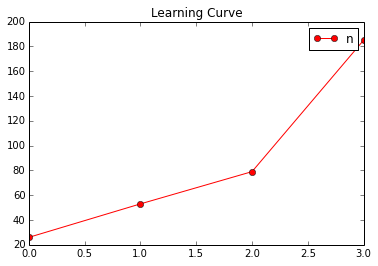

In [180]:
plt.figure()
plt.plot(n_train, 'o-', color="r",label="number of train")
plt.title('Learning Curve')
plt.legend('number of train')

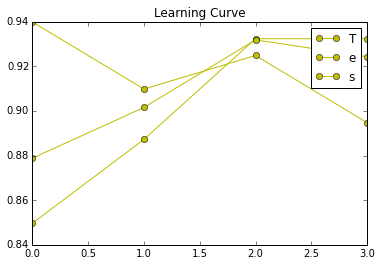

In [181]:
plt.plot(test_score, 'o-', color="y",label="Test score")
plt.title('Learning Curve')
plt.legend('Test score')

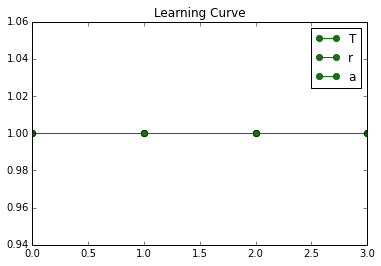

In [182]:
plt.plot(train_score, 'o-', color="g",label="Training score")
plt.title('Learning Curve')
plt.legend('Training score')

<h4> <u>QUESTION 3 :</u> Why isn't the training score equal to one?</h4>
<p><i>Type your answer here</i></p>
<h4> It is equal to one here.</h4>
<p>A second tool meant to investigate a specific parameter influence on scores is the <i>validation curve</i>. It is basically like a gridsearch with a single parameter. </p>

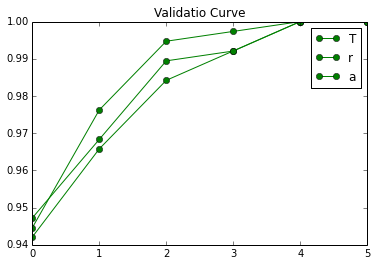

In [183]:
from sklearn.learning_curve import validation_curve

#Just an example
train_score,test_score = validation_curve(new_dtr,data,target,param_name='max_depth',param_range=np.arange(2,8),cv=3)

###Plot the validation curve
plt.plot(train_score, 'o-', color="g",label="Training score")
plt.title('Validatio Curve')
plt.legend('Training score')

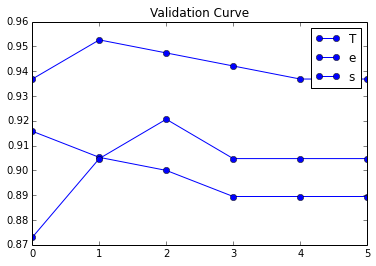

In [184]:
plt.plot(test_score, 'o-', color="b",label="Test score")
plt.title('Validation Curve')
plt.legend('Test score')

<h3>Application - Evaluating the Random Forest classifier and the SVC</h3>

<p>In the following you will apply the evaluation and optimization tools to compare the Random Forest technique and the SVC technique.</p>

In [185]:
###Import the "RandomForestClassifier" classifier
from sklearn.ensemble import RandomForestClassifier
###Train it on the training set
rfc = RandomForestClassifier()
rfc.fit(train,train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [186]:
rfc.get_params().keys()

['warm_start',
 'oob_score',
 'n_jobs',
 'verbose',
 'max_leaf_nodes',
 'bootstrap',
 'min_samples_leaf',
 'n_estimators',
 'min_samples_split',
 'min_weight_fraction_leaf',
 'criterion',
 'random_state',
 'max_features',
 'max_depth',
 'class_weight']

In [187]:
###Import the "SVC" classifier
from sklearn.svm import SVC
###Train it on the training set  (don't forget to scale it!)
svc = SVC()
svc.fit(train,train_target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<p>Before evaluating the performance of both classifiers we will first determine the best values for their parameters</p>

In [188]:
###Using the grid search optimize the Random Forest Classifier
pa_grid=dict({'criterion':['entropy','gini'],'random_state':[0]})
grdrfc = GridSearchCV(rfc,cv=3,param_grid=pa_grid)
grdrfc.fit(train,train_target)


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'random_state': [0], 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [189]:
###Create a new Random Forest Classifier using the best parameters found
new_rfc = grdrfc.best_estimator_
new_rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [190]:
svc.get_params().keys()

['kernel',
 'C',
 'verbose',
 'probability',
 'degree',
 'shrinking',
 'max_iter',
 'decision_function_shape',
 'random_state',
 'tol',
 'cache_size',
 'coef0',
 'gamma',
 'class_weight']

In [191]:
###Using the grid search optimize the SVC Classifier
#(!don't forget to scale the data!)
par_grid=dict({'random_state':[0]})
grdSVC = GridSearchCV(svc,cv=3,param_grid=par_grid)
grdSVC.fit(train,train_target)


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1, param_grid={'random_state': [0]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [133]:
###Create a new SVC Classifier using the best parameters found
new_SVC = grdSVC.best_estimator_
new_SVC

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

<p>Now we have optimized out two classifier we can compare how they perform</p>

In [134]:
###Compute and the accuracy of both classifiers on the training set using the cross_val_score
# (!scale for SVC!)

scores = cross_val_score(new_rfc, dataset.data, dataset.target)
print 'Scores for new-rfc =', scores, '\n mean ==', np.mean(scores), '\n standard_deviation ==', np.std(scores)
#Print the results (average and std)

Scores for new-rfc = [ 0.94736842  0.95789474  0.95238095] 
 mean == 0.952548036759 
 standard_deviation == 0.00429897421229


In [135]:
scores = cross_val_score(new_SVC, dataset.data, dataset.target)
print 'Scores for new-SVC =', scores, '\n mean ==', np.mean(scores), '\n standard_deviation ==', np.std(scores)

Scores for new-SVC = [ 0.62631579  0.62631579  0.62962963] 
 mean == 0.627420402859 
 standard_deviation == 0.00156215923069


In [192]:
new_rfc.fit(train,train_target)
new_SVC.fit(train,train_target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

<h4> <u>QUESTION 4 :</u> Which classifier gives the best accuracy?</h4>
<p><i>Type your answer here</i></p>
<h4> The SVC Classifier </h4>

In [193]:
###Print the Classification report for the Random Forest Classifier
pre_a = new_rfc.predict(test)
print classification_report(test_target,pre_a,target_names=dataset.target_names)

             precision    recall  f1-score   support

  malignant       0.92      0.95      0.94        63
     benign       0.97      0.95      0.96       108

avg / total       0.95      0.95      0.95       171



In [194]:
###Do the same for the SVC classifier
pre1 = new_SVC.predict(test)
print classification_report(test_target,pre1,target_names=dataset.target_names)

             precision    recall  f1-score   support

  malignant       0.98      0.95      0.97        63
     benign       0.97      0.99      0.98       108

avg / total       0.98      0.98      0.98       171



<h4> <u>QUESTION 5 :</u> Analyze the last two classification reports.</h4>
<p><i>Type your answer here</i></p>
<h4> Here, we the SVC report's 'avg/total' is stable comparing to the new_rfc report. The analyse gives that the  is second more accuate than than the first. </h4>
<h4> <u>QUESTION 6 :</u> Recall the classification report from the optimized decision tree to conclude on the best algorithm to chose to efficiently detect malignant masses.</h4>
<p><i>Type your answer here</i></p>
<h4> Study shows that  SVC Classifier is the best of both all the two others comparing the results of classification report.  </h4>
<h4> <u>BONUS :</u> Repeat the optimization and evalution procedure with the k-nearest neighbors approach.</h4>
<p><i>Type your answer here</i></p>
<h4> Ok, we find the SVC is always better than KNeighbors too. </h4>

In [195]:
#Recall optimized decision tree
pre = new_dtr.predict(test)
print classification_report(test_target,pre,target_names=dataset.target_names)

             precision    recall  f1-score   support

  malignant       0.91      0.97      0.94        63
     benign       0.98      0.94      0.96       108

avg / total       0.95      0.95      0.95       171



In [196]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [197]:
knn.fit(train,train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [198]:
pr = knn.predict(test)
accknn = knn.score(test,test_target)
accknn

0.95906432748538006

In [199]:
para_grid=dict({'algorithm':['auto','brute']})
grdknn = GridSearchCV(knn,cv=3,param_grid=para_grid)


In [200]:
grdknn.fit(train,train_target)
pr1 = grdknn.predict(test)
accgrdknn = grdknn.score(test,test_target)
accgrdknn


0.95906432748538006

In [201]:
print classification_report(test_target,pr1,target_names=dataset.target_names)

             precision    recall  f1-score   support

  malignant       0.98      0.90      0.94        63
     benign       0.95      0.99      0.97       108

avg / total       0.96      0.96      0.96       171

